# Demo for burst detections

This notebook aims to generate a signal with known beta burst components and to apply the hidden Markov model (HMM) detection method.



# Definitions


In [ ]:
# -------------------------------
# Define path
Ruta            = "/content/drive/My Drive/00_JMAO/11_PROJECTS/Project_BetaBurst/Code/"


# Import libraries

In [ ]:
# -------------------------------
# Install hmmlearn
%%capture
! pip install hmmlearn


In [ ]:
# -------------------------------
# Install mne
%%capture
! pip install mne


In [ ]:
# -------------------------------
# Import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# -------------------------------
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

# -------------------------------
# Insert the directory
import sys
sys.path.insert(0,Ruta)

# -------------------------------
# Import custom made functions
import ToolboxBurstsDetection as TBD


Mounted at /content/drive


# Generate signal

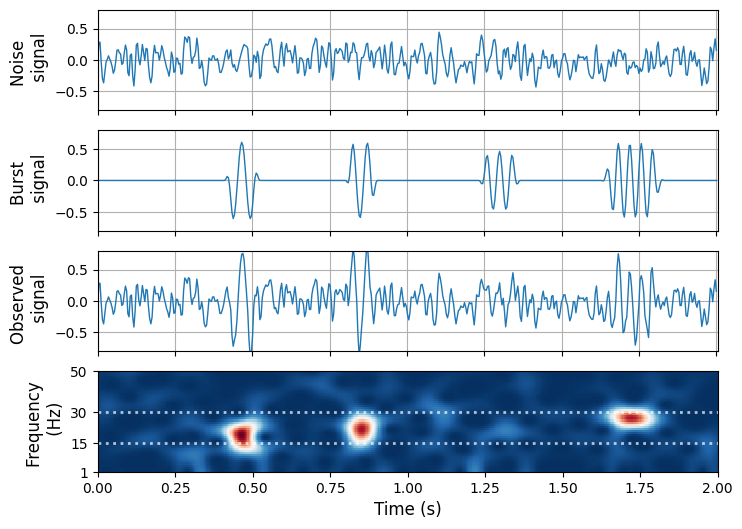

In [ ]:
# -------------------------------
# Generate a signal with burts components
fs                = 256
SignalDuration    = 2.0

xraw, t, _, _, _, _, _, _ = TBD.GenerateSignalWithBurstsV1(fs, SignalDuration, True )


In [ ]:
# -------------------------------
# Print signal information
print( type(xraw) )
print( xraw.shape )


<class 'numpy.ndarray'>
(512,)


# Hidden Markov Model (HMM) method

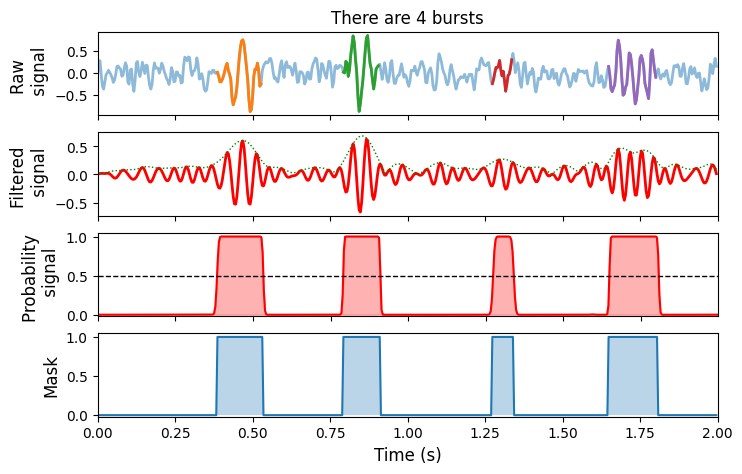

In [ ]:
# -------------------------------
# Define frequency band
FrequencyBand   = [15, 29]  # Hz

# -------------------------------
# Set parameters

# Probability threshold
THRProb        = 0.5

# Minimum bursts/segment duration (i.e., eliminate segments with duration lower than this)
MinSegDur      = 50 # ms

# -------------------------------
# Burst detection using the HMM method
maskHMM = TBD.BurstDetection_HMM(xraw, fs, FrequencyBand, THRProb, MinSegDur, 'Amplitude', True, True)


There are:                4 bursts 
Burst rate:               2.0 burst/s 
 
Duration:                 [0.14453125, 0.1171875, 0.06640625, 0.15625] s
Peak amplitude:           [0.5961499231533456, 0.668387334751747, 0.26242391429897816, 0.4593757670704404] u
 
Peak frequency:           [21.0, 22.0, 23.0, 26.0] Hz
Peak frequency magnitude: [0.064141021628253, 0.05954274788605895, 0.016206290191855897, 0.06116318863033395]
 


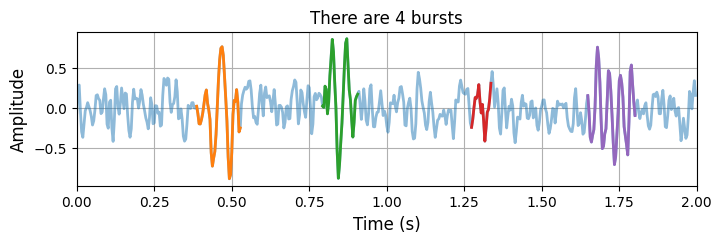

In [ ]:
# -------------------------------
# Compute characteristics
charsHMM, rateHMM, _, eventsHMM = TBD.ComputeBurstCharacteristicsFromMask(maskHMM, xraw, fs, FrequencyBand, True, True )
